# Import Required Packages

In [1]:
import random
import textwrap
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")
import AdvEMDpy
import emd_basis
import emd_utils
import emd_mean
from AdvEMDpy import EMD
from emd_utils import Utility, time_extension
from emd_preprocess import Preprocess
from scipy.interpolate import CubicSpline
from emd_hilbert import hilbert_spectrum
from emd_mean import Fluctuation

# Figure 1

In [3]:
pseudo_alg_time = np.linspace(0, 2 * np.pi, 1001)
pseudo_alg_time_series = np.sin(pseudo_alg_time) + np.sin(5 * pseudo_alg_time)
pseudo_utils = Utility(time=pseudo_alg_time, time_series=pseudo_alg_time_series)

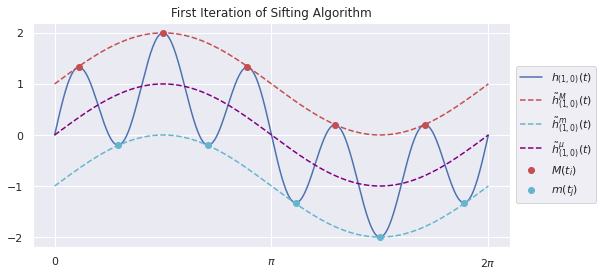

In [4]:
fig = plt.figure(figsize=(9, 4))
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.title('First Iteration of Sifting Algorithm')
plt.plot(pseudo_alg_time, pseudo_alg_time_series, label=r'$h_{(1,0)}(t)$', zorder=1)
plt.scatter(pseudo_alg_time[pseudo_utils.max_bool_func_1st_order_fd()],
            pseudo_alg_time_series[pseudo_utils.max_bool_func_1st_order_fd()],
            c='r', label=r'$M(t_i)$', zorder=2)
plt.plot(pseudo_alg_time, np.sin(pseudo_alg_time) + 1, '--', c='r', label=r'$\tilde{h}_{(1,0)}^M(t)$', zorder=4)
plt.scatter(pseudo_alg_time[pseudo_utils.min_bool_func_1st_order_fd()],
            pseudo_alg_time_series[pseudo_utils.min_bool_func_1st_order_fd()],
            c='c', label=r'$m(t_j)$', zorder=3)
plt.plot(pseudo_alg_time, np.sin(pseudo_alg_time) - 1, '--', c='c', label=r'$\tilde{h}_{(1,0)}^m(t)$', zorder=5)
plt.plot(pseudo_alg_time, np.sin(pseudo_alg_time), '--', c='purple', label=r'$\tilde{h}_{(1,0)}^{\mu}(t)$', zorder=5)
plt.yticks(ticks=[-2, -1, 0, 1, 2])
plt.xticks(ticks=[0, np.pi, 2 * np.pi],
           labels=[r'0', r'$\pi$', r'$2\pi$'])
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.95, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 2

In [5]:
knots = np.arange(12)
time = np.linspace(0, 11, 1101)
basis = emd_basis.Basis(time=time, time_series=time)
b_spline_basis = basis.cubic_b_spline(knots)
chsi_basis = basis.chsi_basis(knots)

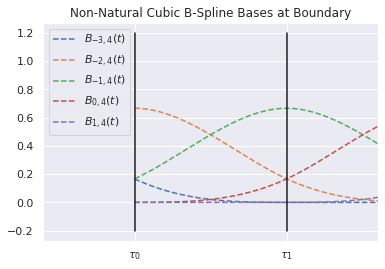

In [6]:
plt.title('Non-Natural Cubic B-Spline Bases at Boundary')
plt.plot(time[500:], b_spline_basis[2, 500:].T, '--', label=r'$ B_{-3,4}(t) $')
plt.plot(time[500:], b_spline_basis[3, 500:].T, '--', label=r'$ B_{-2,4}(t) $')
plt.plot(time[500:], b_spline_basis[4, 500:].T, '--', label=r'$ B_{-1,4}(t) $')
plt.plot(time[500:], b_spline_basis[5, 500:].T, '--', label=r'$ B_{0,4}(t) $')
plt.plot(time[500:], b_spline_basis[6, 500:].T, '--', label=r'$ B_{1,4}(t) $')
plt.xticks([5, 6], [r'$ \tau_0 $', r'$ \tau_1 $'])
plt.xlim(4.4, 6.6)
plt.plot(5 * np.ones(100), np.linspace(-0.2, 1.2, 100), 'k-')
plt.plot(6 * np.ones(100), np.linspace(-0.2, 1.2, 100), 'k-')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

# Figure 3

In [7]:
knot_demonstrate_time = np.linspace(0, 2 * np.pi, 1001)
knot_demonstrate_time_series = np.sin(knot_demonstrate_time) + np.sin(5 * knot_demonstrate_time)
knots_uniform = np.linspace(0, 2 * np.pi, 51)
emd = EMD(time=knot_demonstrate_time, time_series=knot_demonstrate_time_series)
imfs = emd.empirical_mode_decomposition(knots=knots_uniform, edge_effect='anti-symmetric')[0]

IMF_11 ALL IMF CONDITIONS MET
IMF_21 TREND CONDITION MET with fewer than 3 extrema and global mean removed
IMF_22 ALL IMF CONDITIONS MET


/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


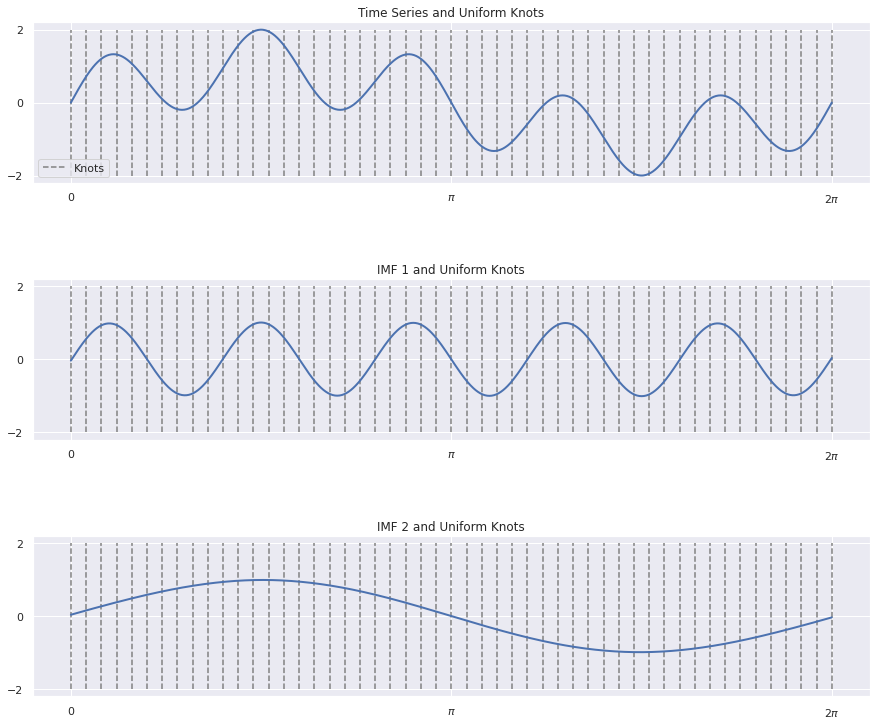

In [8]:
fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.6)
plt.gcf().subplots_adjust(bottom=0.10)
axs[0].set_title('Time Series and Uniform Knots')
axs[0].plot(knot_demonstrate_time, knot_demonstrate_time_series, Linewidth=2, zorder=100)
axs[0].set_yticks(ticks=[-2, 0, 2])
axs[0].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[0].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[1].set_title('IMF 1 and Uniform Knots')
axs[1].plot(knot_demonstrate_time, imfs[1, :], Linewidth=2, zorder=100)
axs[1].set_yticks(ticks=[-2, 0, 2])
axs[1].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[1].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[2].set_title('IMF 2 and Uniform Knots')
axs[2].plot(knot_demonstrate_time, imfs[2, :], Linewidth=2, zorder=100)
axs[2].set_yticks(ticks=[-2, 0, 2])
axs[2].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[2].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[0].plot(knots_uniform[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[0].legend(loc='lower left')
axs[1].plot(knots_uniform[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[2].plot(knots_uniform[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
for i in range(3):
    for j in range(1, len(knots_uniform)):
        axs[i].plot(knots_uniform[j] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey')
plt.show()

# Figure 4

In [9]:
knot_demonstrate_time = np.linspace(0, 2 * np.pi, 1001)
knot_demonstrate_time_series = np.sin(knot_demonstrate_time) + np.sin(5 * knot_demonstrate_time)
emd = EMD(time=knot_demonstrate_time, time_series=knot_demonstrate_time_series)
imfs, _, _, _, knots, _, _ = emd.empirical_mode_decomposition(edge_effect='anti-symmetric', optimise_knots=1)

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 424363.89
IMF_12 ALL IMF CONDITIONS MET
IMF_21 ALL IMF CONDITIONS MET


/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


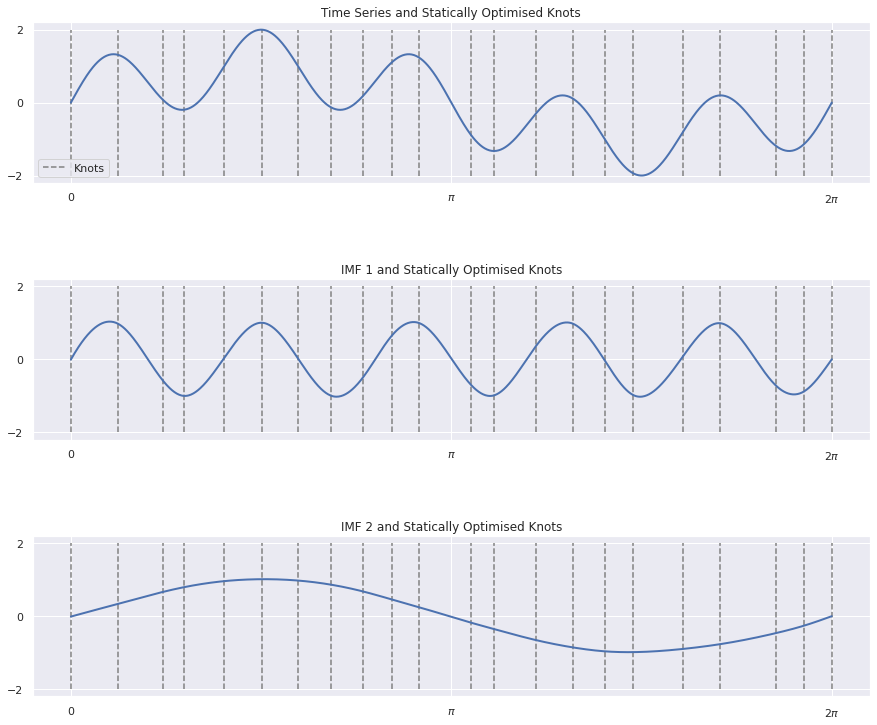

In [10]:
fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.6)
plt.gcf().subplots_adjust(bottom=0.10)
axs[0].set_title('Time Series and Statically Optimised Knots')
axs[0].plot(knot_demonstrate_time, knot_demonstrate_time_series, Linewidth=2, zorder=100)
axs[0].set_yticks(ticks=[-2, 0, 2])
axs[0].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[0].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[1].set_title('IMF 1 and Statically Optimised Knots')
axs[1].plot(knot_demonstrate_time, imfs[1, :], Linewidth=2, zorder=100)
axs[1].set_yticks(ticks=[-2, 0, 2])
axs[1].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[1].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[2].set_title('IMF 2 and Statically Optimised Knots')
axs[2].plot(knot_demonstrate_time, imfs[2, :], Linewidth=2, zorder=100)
axs[2].set_yticks(ticks=[-2, 0, 2])
axs[2].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[2].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[0].plot(knots[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[0].legend(loc='lower left')
axs[1].plot(knots[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[2].plot(knots[0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
for i in range(3):
    for j in range(1, len(knots)):
        axs[i].plot(knots[j] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey')
plt.show()

# Figure 5

In [11]:
knot_demonstrate_time = np.linspace(0, 2 * np.pi, 1001)
knot_demonstrate_time_series = np.sin(knot_demonstrate_time) + np.sin(5 * knot_demonstrate_time)
emd = EMD(time=knot_demonstrate_time, time_series=knot_demonstrate_time_series)
imfs, _, _, _, knots, _, _ = emd.empirical_mode_decomposition(edge_effect='anti-symmetric', optimise_knots=2)

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 424363.89
IMF_12 ALL IMF CONDITIONS MET
IMF_21 TREND CONDITION MET with fewer than 3 extrema and global mean removed
IMF_22 ALL IMF CONDITIONS MET


/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


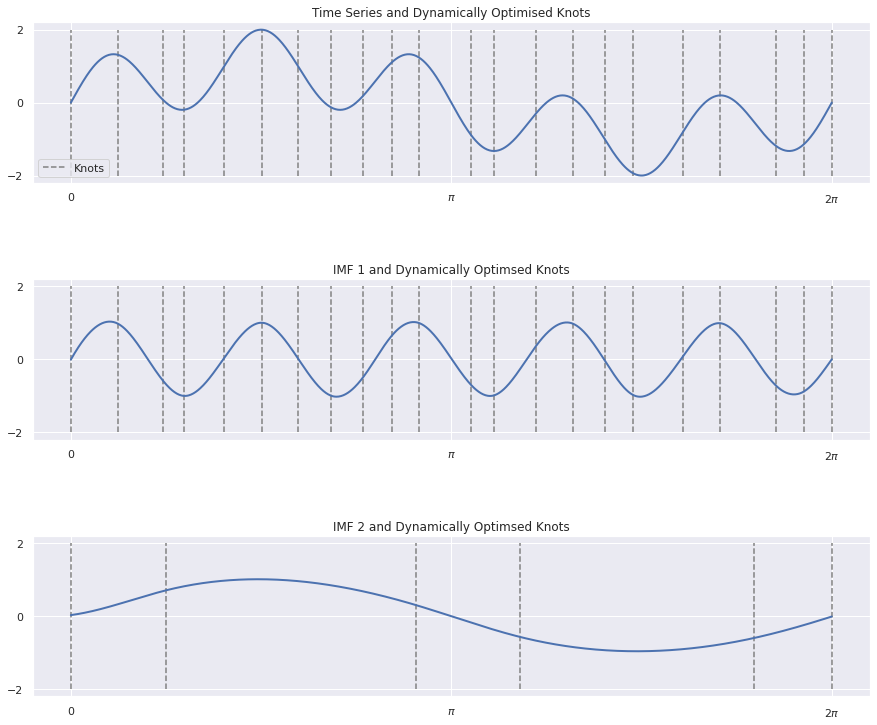

In [13]:
fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.6)
plt.gcf().subplots_adjust(bottom=0.10)
axs[0].set_title('Time Series and Dynamically Optimised Knots')
axs[0].plot(knot_demonstrate_time, knot_demonstrate_time_series, Linewidth=2, zorder=100)
axs[0].set_yticks(ticks=[-2, 0, 2])
axs[0].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[0].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[1].set_title('IMF 1 and Dynamically Optimsed Knots')
axs[1].plot(knot_demonstrate_time, imfs[1, :], Linewidth=2, zorder=100)
axs[1].set_yticks(ticks=[-2, 0, 2])
axs[1].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[1].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[2].set_title('IMF 2 and Dynamically Optimsed Knots')
axs[2].plot(knot_demonstrate_time, imfs[2, :], Linewidth=2, zorder=100)
axs[2].set_yticks(ticks=[-2, 0, 2])
axs[2].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[2].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[0].plot(knots[0][0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[0].legend(loc='lower left')
axs[1].plot(knots[1][0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
axs[2].plot(knots[2][0] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey', label='Knots')
for i in range(3):
    for j in range(1, len(knots[i])):
        axs[i].plot(knots[i][j] * np.ones(101), np.linspace(-2, 2, 101), '--', c='grey')
plt.show()

# Figure 6

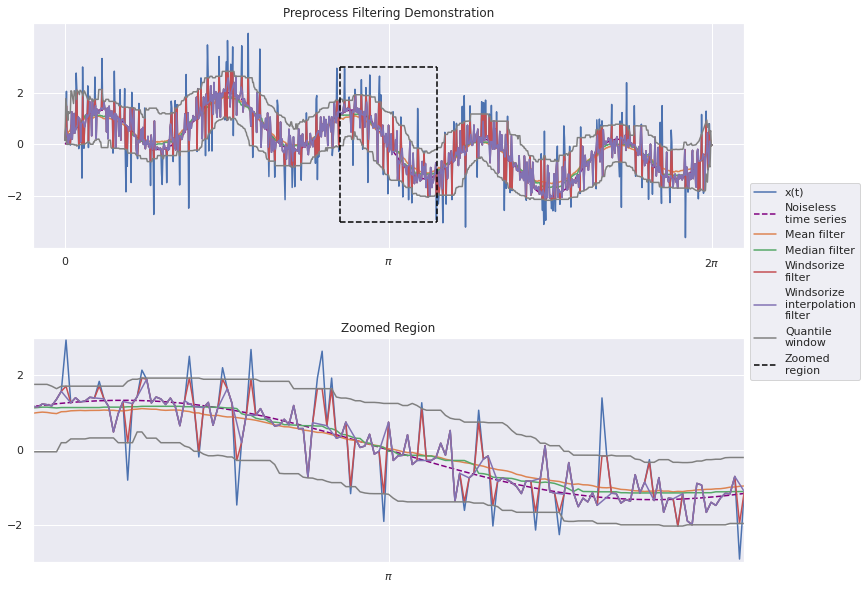

In [14]:
window = 81
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)
figure_size = plt.gcf().get_size_inches()
factor = 0.8
plt.gcf().set_size_inches((figure_size[0], factor * figure_size[1]))
plt.gcf().subplots_adjust(bottom=0.10)
axs[0].set_title('Preprocess Filtering Demonstration')
axs[1].set_title('Zoomed Region')
preprocess_time = pseudo_alg_time.copy()
np.random.seed(1)
random.seed(1)
preprocess_time_series = pseudo_alg_time_series + np.random.normal(0, 0.1, len(preprocess_time))
for i in random.sample(range(1000), 500):
    preprocess_time_series[i] += np.random.normal(0, 1)
preprocess = Preprocess(time=preprocess_time, time_series=preprocess_time_series)
axs[0].plot(preprocess_time, preprocess_time_series, label='x(t)')
axs[0].plot(pseudo_alg_time, pseudo_alg_time_series, '--', c='purple',
            label=textwrap.fill('Noiseless time series', 12))
axs[0].plot(preprocess_time, preprocess.mean_filter(window_width=window)[1], label=textwrap.fill('Mean filter', 12))
axs[0].plot(preprocess_time, preprocess.median_filter(window_width=window)[1], label=textwrap.fill('Median filter', 13))
axs[0].plot(preprocess_time, preprocess.winsorize(window_width=window, a=0.8)[1], label=textwrap.fill('Windsorize filter', 12))
axs[0].plot(preprocess_time, preprocess.winsorize_interpolate(window_width=window, a=0.8)[1],
            label=textwrap.fill('Windsorize interpolation filter', 14))
axs[0].plot(preprocess_time, preprocess.quantile_filter(window_width=window, q=0.90)[1], c='grey',
            label=textwrap.fill('Quantile window', 12))
axs[0].plot(preprocess_time, preprocess.quantile_filter(window_width=window, q=0.10)[1], c='grey')

axs[0].plot(np.linspace(0.85 * np.pi, 1.15 * np.pi, 101), -3 * np.ones(101), '--', c='black',
            label=textwrap.fill('Zoomed region', 10))
axs[0].plot(np.linspace(0.85 * np.pi, 1.15 * np.pi, 101), 3 * np.ones(101), '--', c='black')
axs[0].plot(0.85 * np.pi * np.ones(101), np.linspace(-3, 3, 101), '--', c='black')
axs[0].plot(1.15 * np.pi * np.ones(101), np.linspace(-3, 3, 101), '--', c='black')

axs[0].set_yticks(ticks=[-2, 0, 2])
axs[0].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[0].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[1].plot(preprocess_time, preprocess_time_series, label='x(t)')
axs[1].plot(pseudo_alg_time, pseudo_alg_time_series, '--', c='purple', label=textwrap.fill('Noiseless time series', 12))
axs[1].plot(preprocess_time, preprocess.mean_filter(window_width=window)[1], label=textwrap.fill('Mean filter', 12))
axs[1].plot(preprocess_time, preprocess.median_filter(window_width=window)[1], label=textwrap.fill('Median filter', 13))
axs[1].plot(preprocess_time, preprocess.winsorize(window_width=window, a=0.8)[1], label=textwrap.fill('Windsorize filter', 12))
axs[1].plot(preprocess_time, preprocess.winsorize_interpolate(window_width=window, a=0.8)[1],
            label=textwrap.fill('Windsorize interpolation filter', 14))
axs[1].plot(preprocess_time, preprocess.quantile_filter(window_width=window, q=0.90)[1], c='grey',
            label=textwrap.fill('Quantile window', 12))
axs[1].plot(preprocess_time, preprocess.quantile_filter(window_width=window, q=0.10)[1], c='grey')
axs[1].set_xlim(0.85 * np.pi, 1.15 * np.pi)
axs[1].set_ylim(-3, 3)
axs[1].set_yticks(ticks=[-2, 0, 2])
axs[1].set_xticks(ticks=[np.pi])
axs[1].set_xticklabels(labels=[r'$\pi$'])
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, -0.15))
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.85, box_1.height])
plt.show()

# Figure 7

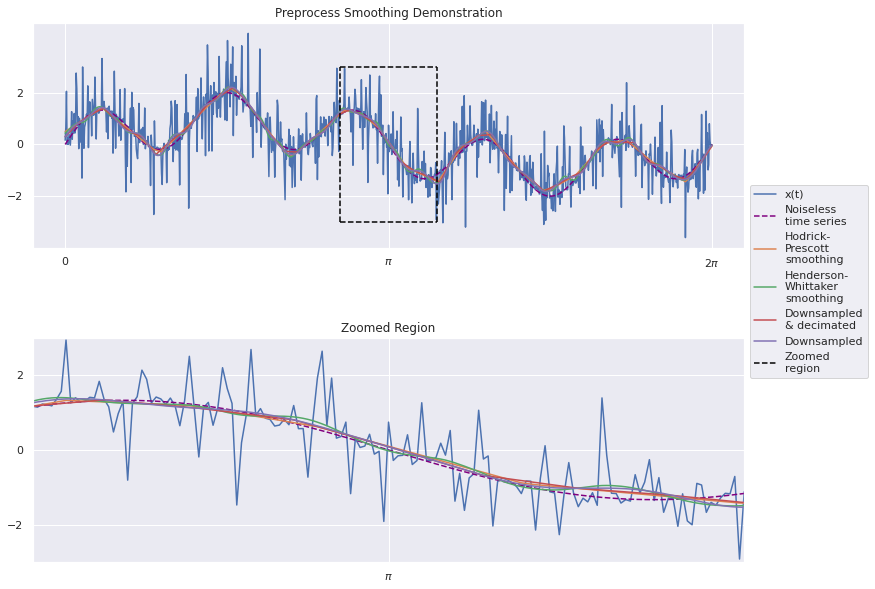

In [15]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.4)
figure_size = plt.gcf().get_size_inches()
factor = 0.8
plt.gcf().set_size_inches((figure_size[0], factor * figure_size[1]))
plt.gcf().subplots_adjust(bottom=0.10)
axs[0].set_title('Preprocess Smoothing Demonstration')
axs[1].set_title('Zoomed Region')
axs[0].plot(preprocess_time, preprocess_time_series, label='x(t)')
axs[0].plot(pseudo_alg_time, pseudo_alg_time_series, '--', c='purple',
            label=textwrap.fill('Noiseless time series', 12))
axs[0].plot(preprocess_time, preprocess.hp()[1],
            label=textwrap.fill('Hodrick-Prescott smoothing', 12))
axs[0].plot(preprocess_time, preprocess.hw(order=51)[1],
            label=textwrap.fill('Henderson-Whittaker smoothing', 13))
downsampled_and_decimated = preprocess.downsample()
axs[0].plot(downsampled_and_decimated[0], downsampled_and_decimated[1],
            label=textwrap.fill('Downsampled & decimated', 11))
downsampled = preprocess.downsample(decimate=False)
axs[0].plot(downsampled[0], downsampled[1],
            label=textwrap.fill('Downsampled', 13))
axs[0].plot(np.linspace(0.85 * np.pi, 1.15 * np.pi, 101), -3 * np.ones(101), '--', c='black',
            label=textwrap.fill('Zoomed region', 10))
axs[0].plot(np.linspace(0.85 * np.pi, 1.15 * np.pi, 101), 3 * np.ones(101), '--', c='black')
axs[0].plot(0.85 * np.pi * np.ones(101), np.linspace(-3, 3, 101), '--', c='black')
axs[0].plot(1.15 * np.pi * np.ones(101), np.linspace(-3, 3, 101), '--', c='black')
axs[0].set_yticks(ticks=[-2, 0, 2])
axs[0].set_xticks(ticks=[0, np.pi, 2 * np.pi])
axs[0].set_xticklabels(labels=['0', r'$\pi$', r'$2\pi$'])
axs[1].plot(preprocess_time, preprocess_time_series, label='x(t)')
axs[1].plot(pseudo_alg_time, pseudo_alg_time_series, '--', c='purple',
            label=textwrap.fill('Noiseless time series', 12))
axs[1].plot(preprocess_time, preprocess.hp()[1],
            label=textwrap.fill('Hodrick-Prescott smoothing', 12))
axs[1].plot(preprocess_time, preprocess.hw(order=51)[1],
            label=textwrap.fill('Henderson-Whittaker smoothing', 13))
axs[1].plot(downsampled_and_decimated[0], downsampled_and_decimated[1],
            label=textwrap.fill('Downsampled & decimated', 13))
axs[1].plot(downsampled[0], downsampled[1],
            label=textwrap.fill('Downsampled', 13))
axs[1].set_xlim(0.85 * np.pi, 1.15 * np.pi)
axs[1].set_ylim(-3, 3)
axs[1].set_yticks(ticks=[-2, 0, 2])
axs[1].set_xticks(ticks=[np.pi])
axs[1].set_xticklabels(labels=[r'$\pi$'])
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.06, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, -0.15))
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.06, box_1.y0, box_1.width * 0.85, box_1.height])
plt.show()

# Figure 8

In [16]:
a = 0.25
width = 0.2
time = np.linspace(0, (5 - a) * np.pi, 1001)
time_series = np.cos(time) + np.cos(5 * time)
utils = emd_utils.Utility(time=time, time_series=time_series)
max_bool = utils.max_bool_func_1st_order_fd()
maxima_x = time[max_bool]
maxima_y = time_series[max_bool]
min_bool = utils.min_bool_func_1st_order_fd()
minima_x = time[min_bool]
minima_y = time_series[min_bool]
max_dash_time = np.linspace(maxima_x[-1] - width, maxima_x[-1] + width, 101)
max_dash = maxima_y[-1] * np.ones_like(max_dash_time)
min_dash_time = np.linspace(minima_x[-1] - width, minima_x[-1] + width, 101)
min_dash = minima_y[-1] * np.ones_like(min_dash_time)
dash_1_time = np.linspace(maxima_x[-1], minima_x[-1], 101)
dash_1 = np.linspace(maxima_y[-1], minima_y[-1], 101)
max_discard = maxima_y[-1]
max_discard_time = minima_x[-1] - maxima_x[-1] + minima_x[-1]
max_discard_dash_time = np.linspace(max_discard_time - width, max_discard_time + width, 101)
max_discard_dash = max_discard * np.ones_like(max_discard_dash_time)
dash_2_time = np.linspace(minima_x[-1], max_discard_time, 101)
dash_2 = np.linspace(minima_y[-1], max_discard, 101)
end_point_time = time[-1]
end_point = time_series[-1]
time_reflect = np.linspace((5 - a) * np.pi, (5 + a) * np.pi, 101)
time_series_reflect = np.flip(np.cos(np.linspace((5 - 2.6 * a) * np.pi, (5 - a) * np.pi, 101)) + np.cos(5 * np.linspace((5 - 2.6 * a) * np.pi, (5 - a) * np.pi, 101)))
time_series_anti_reflect = time_series_reflect[0] - time_series_reflect
utils = emd_utils.Utility(time=time, time_series=time_series_anti_reflect)
anti_max_bool = utils.max_bool_func_1st_order_fd()
anti_max_point_time = time_reflect[anti_max_bool]
anti_max_point = time_series_anti_reflect[anti_max_bool]
utils = emd_utils.Utility(time=time, time_series=time_series_reflect)
no_anchor_max_time = time_reflect[utils.max_bool_func_1st_order_fd()]
no_anchor_max = time_series_reflect[utils.max_bool_func_1st_order_fd()]
point_1 = 5.4
length_distance = np.linspace(maxima_y[-1], minima_y[-1], 101)
length_distance_time = point_1 * np.pi * np.ones_like(length_distance)
length_time = np.linspace(point_1 * np.pi - width, point_1 * np.pi + width, 101)
length_top = maxima_y[-1] * np.ones_like(length_time)
length_bottom = minima_y[-1] * np.ones_like(length_time)
point_2 = 5.2
length_distance_2 = np.linspace(time_series[-1], minima_y[-1], 101)
length_distance_time_2 = point_2 * np.pi * np.ones_like(length_distance_2)
length_time_2 = np.linspace(point_2 * np.pi - width, point_2 * np.pi + width, 101)
length_top_2 = time_series[-1] * np.ones_like(length_time_2)
length_bottom_2 = minima_y[-1] * np.ones_like(length_time_2)
symmetry_axis_1_time = minima_x[-1] * np.ones(101)
symmetry_axis_2_time = time[-1] * np.ones(101)
symmetry_axis = np.linspace(-2, 2, 101)
end_time = np.linspace(time[-1] - width, time[-1] + width, 101)
end_signal = time_series[-1] * np.ones_like(end_time)
anti_symmetric_time = np.linspace(time[-1] - 0.5, time[-1] + 0.5, 101)
anti_symmetric_signal = time_series[-1] * np.ones_like(anti_symmetric_time)

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


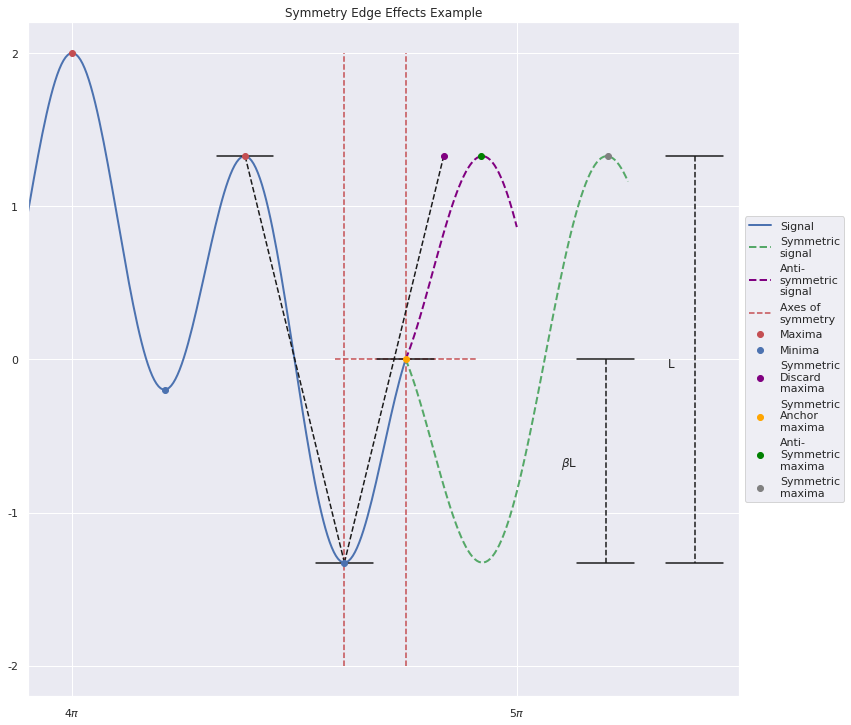

In [17]:
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.plot(time, time_series, LineWidth=2, label='Signal')
plt.title('Symmetry Edge Effects Example')
plt.plot(time_reflect, time_series_reflect, 'g--', LineWidth=2, label=textwrap.fill('Symmetric signal', 10))
plt.plot(time_reflect[:51], time_series_anti_reflect[:51], '--', c='purple', LineWidth=2, label=textwrap.fill('Anti-symmetric signal', 10))
plt.plot(max_dash_time, max_dash, 'k-')
plt.plot(min_dash_time, min_dash, 'k-')
plt.plot(dash_1_time, dash_1, 'k--')
plt.plot(dash_2_time, dash_2, 'k--')
plt.plot(length_distance_time, length_distance, 'k--')
plt.plot(length_distance_time_2, length_distance_2, 'k--')
plt.plot(length_time, length_top, 'k-')
plt.plot(length_time, length_bottom, 'k-')
plt.plot(length_time_2, length_top_2, 'k-')
plt.plot(length_time_2, length_bottom_2, 'k-')
plt.plot(end_time, end_signal, 'k-')
plt.plot(symmetry_axis_1_time, symmetry_axis, 'r--', zorder=1)
plt.plot(anti_symmetric_time, anti_symmetric_signal, 'r--', zorder=1)
plt.plot(symmetry_axis_2_time, symmetry_axis, 'r--', label=textwrap.fill('Axes of symmetry', 10), zorder=1)
plt.text(5.1 * np.pi, -0.7, r'$\beta$L')
plt.text(5.34 * np.pi, -0.05, 'L')
plt.scatter(maxima_x, maxima_y, c='r', zorder=4, label='Maxima')
plt.scatter(minima_x, minima_y, c='b', zorder=4, label='Minima')
plt.scatter(max_discard_time, max_discard, c='purple', zorder=4, label=textwrap.fill('Symmetric Discard maxima', 10))
plt.scatter(end_point_time, end_point, c='orange', zorder=4, label=textwrap.fill('Symmetric Anchor maxima', 10))
plt.scatter(anti_max_point_time, anti_max_point, c='green', zorder=4, label=textwrap.fill('Anti-Symmetric maxima', 10))
plt.scatter(no_anchor_max_time, no_anchor_max, c='gray', zorder=4, label=textwrap.fill('Symmetric maxima', 10))
plt.xlim(3.9 * np.pi, 5.5 * np.pi)
plt.xticks((4 * np.pi, 5 * np.pi), (r'4$\pi$', r'5$\pi$'))
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'))
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 9

In [18]:
a = 0.21
width = 0.2
time = np.linspace(0, (5 - a) * np.pi, 1001)
time_series = np.cos(time) + np.cos(5 * time)
utils = emd_utils.Utility(time=time, time_series=time_series)
max_bool = utils.max_bool_func_1st_order_fd()
maxima_x = time[max_bool]
maxima_y = time_series[max_bool]
min_bool = utils.min_bool_func_1st_order_fd()
minima_x = time[min_bool]
minima_y = time_series[min_bool]
max_dash_1 = np.linspace(maxima_y[-1] - width, maxima_y[-1] + width, 101)
max_dash_2 = np.linspace(maxima_y[-2] - width, maxima_y[-2] + width, 101)
max_dash_time_1 = maxima_x[-1] * np.ones_like(max_dash_1)
max_dash_time_2 = maxima_x[-2] * np.ones_like(max_dash_1)
min_dash_1 = np.linspace(minima_y[-1] - width, minima_y[-1] + width, 101)
min_dash_2 = np.linspace(minima_y[-2] - width, minima_y[-2] + width, 101)
min_dash_time_1 = minima_x[-1] * np.ones_like(min_dash_1)
min_dash_time_2 = minima_x[-2] * np.ones_like(min_dash_1)
dash_1_time = np.linspace(maxima_x[-1], minima_x[-1], 101)
dash_1 = np.linspace(maxima_y[-1], minima_y[-1], 101)
dash_2_time = np.linspace(maxima_x[-1], minima_x[-2], 101)
dash_2 = np.linspace(maxima_y[-1], minima_y[-2], 101)
s1 = (minima_y[-2] - maxima_y[-1]) / (minima_x[-2] - maxima_x[-1])
slope_based_maximum_time = maxima_x[-1] + (maxima_x[-1] - maxima_x[-2])
slope_based_maximum = minima_y[-1] + (slope_based_maximum_time - minima_x[-1]) * s1
max_dash_time_3 = slope_based_maximum_time * np.ones_like(max_dash_1)
max_dash_3 = np.linspace(slope_based_maximum - width, slope_based_maximum + width, 101)
dash_3_time = np.linspace(minima_x[-1], slope_based_maximum_time, 101)
dash_3 = np.linspace(minima_y[-1], slope_based_maximum, 101)
s2 = (minima_y[-1] - maxima_y[-1]) / (minima_x[-1] - maxima_x[-1])
slope_based_minimum_time = minima_x[-1] + (minima_x[-1] - minima_x[-2])
slope_based_minimum = slope_based_maximum - (slope_based_maximum_time - slope_based_minimum_time) * s2
min_dash_time_3 = slope_based_minimum_time * np.ones_like(min_dash_1)
min_dash_3 = np.linspace(slope_based_minimum - width, slope_based_minimum + width, 101)
dash_4_time = np.linspace(slope_based_maximum_time, slope_based_minimum_time)
dash_4 = np.linspace(slope_based_maximum, slope_based_minimum)
maxima_dash = np.linspace(2.5 - width, 2.5 + width, 101)
maxima_dash_time_1 = maxima_x[-2] * np.ones_like(maxima_dash)
maxima_dash_time_2 = maxima_x[-1] * np.ones_like(maxima_dash)
maxima_dash_time_3 = slope_based_maximum_time * np.ones_like(maxima_dash)
maxima_line_dash_time = np.linspace(maxima_x[-2], slope_based_maximum_time, 101)
maxima_line_dash = 2.5 * np.ones_like(maxima_line_dash_time)
minima_dash = np.linspace(-3.4 - width, -3.4 + width, 101)
minima_dash_time_1 = minima_x[-2] * np.ones_like(minima_dash)
minima_dash_time_2 = minima_x[-1] * np.ones_like(minima_dash)
minima_dash_time_3 = slope_based_minimum_time * np.ones_like(minima_dash)
minima_line_dash_time = np.linspace(minima_x[-2], slope_based_minimum_time, 101)
minima_line_dash = -3.4 * np.ones_like(minima_line_dash_time)

# slightly edit signal to make difference between slope-based method and improved slope-based method more clear

time_series[time >= minima_x[-1]] = 1.5 * (time_series[time >= minima_x[-1]] - time_series[time == minima_x[-1]]) + time_series[time == minima_x[-1]]
improved_slope_based_maximum_time = time[-1]
improved_slope_based_maximum = time_series[-1]
improved_slope_based_minimum_time = slope_based_minimum_time
improved_slope_based_minimum = improved_slope_based_maximum + s2 * (improved_slope_based_minimum_time - improved_slope_based_maximum_time)
min_dash_4 = np.linspace(improved_slope_based_minimum - width, improved_slope_based_minimum + width, 101)
min_dash_time_4 = improved_slope_based_minimum_time * np.ones_like(min_dash_4)
dash_final_time = np.linspace(improved_slope_based_maximum_time, improved_slope_based_minimum_time, 101)
dash_final = np.linspace(improved_slope_based_maximum, improved_slope_based_minimum, 101)

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


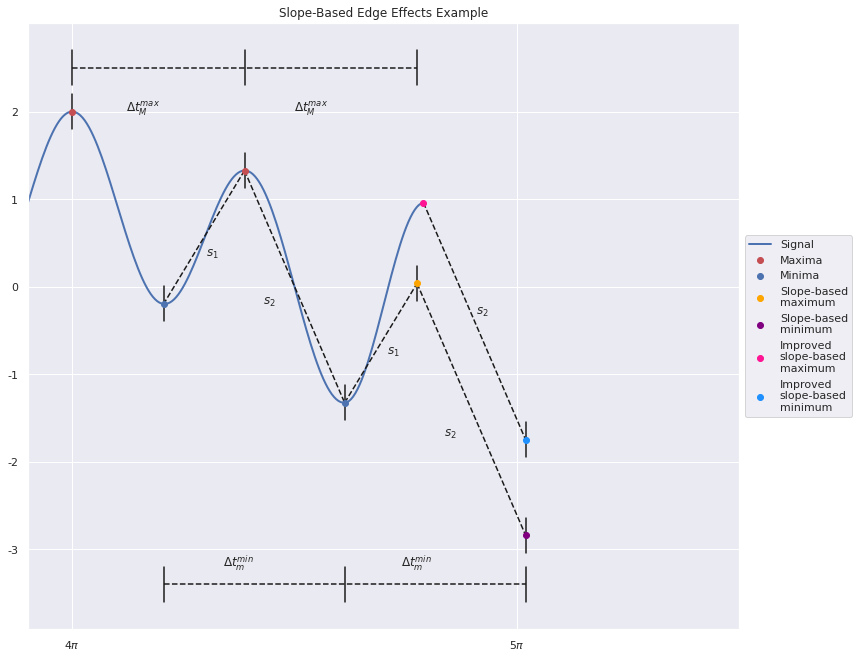

In [19]:
ax = plt.subplot(111)
figure_size = plt.gcf().get_size_inches()
factor = 0.9
plt.gcf().set_size_inches((figure_size[0], factor * figure_size[1]))
plt.gcf().subplots_adjust(bottom=0.10)
plt.plot(time, time_series, LineWidth=2, label='Signal')
plt.title('Slope-Based Edge Effects Example')
plt.plot(max_dash_time_1, max_dash_1, 'k-')
plt.plot(max_dash_time_2, max_dash_2, 'k-')
plt.plot(max_dash_time_3, max_dash_3, 'k-')
plt.plot(min_dash_time_1, min_dash_1, 'k-')
plt.plot(min_dash_time_2, min_dash_2, 'k-')
plt.plot(min_dash_time_3, min_dash_3, 'k-')
plt.plot(min_dash_time_4, min_dash_4, 'k-')
plt.plot(maxima_dash_time_1, maxima_dash, 'k-')
plt.plot(maxima_dash_time_2, maxima_dash, 'k-')
plt.plot(maxima_dash_time_3, maxima_dash, 'k-')
plt.plot(minima_dash_time_1, minima_dash, 'k-')
plt.plot(minima_dash_time_2, minima_dash, 'k-')
plt.plot(minima_dash_time_3, minima_dash, 'k-')
plt.text(4.34 * np.pi, -3.2, r'$\Delta{t^{min}_{m}}$')
plt.text(4.74 * np.pi, -3.2, r'$\Delta{t^{min}_{m}}$')
plt.text(4.12 * np.pi, 2, r'$\Delta{t^{max}_{M}}$')
plt.text(4.50 * np.pi, 2, r'$\Delta{t^{max}_{M}}$')
plt.text(4.30 * np.pi, 0.35, r'$s_1$')
plt.text(4.43 * np.pi, -0.20, r'$s_2$')
plt.text(4.30 * np.pi + (minima_x[-1] - minima_x[-2]), 0.35 + (minima_y[-1] - minima_y[-2]), r'$s_1$')
plt.text(4.43 * np.pi + (slope_based_minimum_time - minima_x[-1]), -0.20 + (slope_based_minimum - minima_y[-1]), r'$s_2$')
plt.text(4.50 * np.pi + (slope_based_minimum_time - minima_x[-1]), 1.20 + (slope_based_minimum - minima_y[-1]), r'$s_2$')
plt.plot(minima_line_dash_time, minima_line_dash, 'k--')
plt.plot(maxima_line_dash_time, maxima_line_dash, 'k--')
plt.plot(dash_1_time, dash_1, 'k--')
plt.plot(dash_2_time, dash_2, 'k--')
plt.plot(dash_3_time, dash_3, 'k--')
plt.plot(dash_4_time, dash_4, 'k--')
plt.plot(dash_final_time, dash_final, 'k--')
plt.scatter(maxima_x, maxima_y, c='r', zorder=4, label='Maxima')
plt.scatter(minima_x, minima_y, c='b', zorder=4, label='Minima')
plt.scatter(slope_based_maximum_time, slope_based_maximum, c='orange', zorder=4, label=textwrap.fill('Slope-based maximum', 11))
plt.scatter(slope_based_minimum_time, slope_based_minimum, c='purple', zorder=4, label=textwrap.fill('Slope-based minimum', 11))
plt.scatter(improved_slope_based_maximum_time, improved_slope_based_maximum, c='deeppink', zorder=4, label=textwrap.fill('Improved slope-based maximum', 11))
plt.scatter(improved_slope_based_minimum_time, improved_slope_based_minimum, c='dodgerblue', zorder=4, label=textwrap.fill('Improved slope-based minimum', 11))
plt.xlim(3.9 * np.pi, 5.5 * np.pi)
plt.xticks((4 * np.pi, 5 * np.pi), (r'4$\pi$', r'5$\pi$'))
plt.yticks((-3, -2, -1, 0, 1, 2), ('-3', '-2', '-1', '0', '1', '2'))
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 10

In [20]:
a = 0.25
width = 0.2
time = np.linspace(0, (5 - a) * np.pi, 1001)
time_series = np.cos(time) + np.cos(5 * time)
utils = emd_utils.Utility(time=time, time_series=time_series)
max_bool = utils.max_bool_func_1st_order_fd()
maxima_x = time[max_bool]
maxima_y = time_series[max_bool]
min_bool = utils.min_bool_func_1st_order_fd()
minima_x = time[min_bool]
minima_y = time_series[min_bool]
A2 = np.abs(maxima_y[-2] - minima_y[-2]) / 2
A1 = np.abs(maxima_y[-1] - minima_y[-1]) / 2
P2 = 2 * np.abs(maxima_x[-2] - minima_x[-2])
P1 = 2 * np.abs(maxima_x[-1] - minima_x[-1])
Huang_time = (P1 / P2) * (time[time >= maxima_x[-2]] - time[time == maxima_x[-2]]) + maxima_x[-1]
Huang_wave = (A1 / A2) * (time_series[time >= maxima_x[-2]] - time_series[time == maxima_x[-2]]) + maxima_y[-1]
Coughlin_time = Huang_time
Coughlin_wave = A1 * np.cos(2 * np.pi * (1 / P1) * (Coughlin_time - Coughlin_time[0]))
Average_max_time = maxima_x[-1] + (maxima_x[-1] - maxima_x[-2])
Average_max = (maxima_y[-2] + maxima_y[-1]) / 2
Average_min_time = minima_x[-1] + (minima_x[-1] - minima_x[-2])
Average_min = (minima_y[-2] + minima_y[-1]) / 2
utils_Huang = emd_utils.Utility(time=time, time_series=Huang_wave)
Huang_max_bool = utils_Huang.max_bool_func_1st_order_fd()
Huang_min_bool = utils_Huang.min_bool_func_1st_order_fd()
utils_Coughlin = emd_utils.Utility(time=time, time_series=Coughlin_wave)
Coughlin_max_bool = utils_Coughlin.max_bool_func_1st_order_fd()
Coughlin_min_bool = utils_Coughlin.min_bool_func_1st_order_fd()
Huang_max_time = Huang_time[Huang_max_bool]
Huang_max = Huang_wave[Huang_max_bool]
Huang_min_time = Huang_time[Huang_min_bool]
Huang_min = Huang_wave[Huang_min_bool]
Coughlin_max_time = Coughlin_time[Coughlin_max_bool]
Coughlin_max = Coughlin_wave[Coughlin_max_bool]
Coughlin_min_time = Coughlin_time[Coughlin_min_bool]
Coughlin_min = Coughlin_wave[Coughlin_min_bool]
max_2_x_time = np.linspace(maxima_x[-2] - width, maxima_x[-2] + width, 101)
max_2_x_time_side = np.linspace(5.3 * np.pi - width, 5.3 * np.pi + width, 101)
max_2_x = maxima_y[-2] * np.ones_like(max_2_x_time)
min_2_x_time = np.linspace(minima_x[-2] - width, minima_x[-2] + width, 101)
min_2_x_time_side = np.linspace(5.3 * np.pi - width, 5.3 * np.pi + width, 101)
min_2_x = minima_y[-2] * np.ones_like(min_2_x_time)
dash_max_min_2_x = np.linspace(minima_y[-2], maxima_y[-2], 101)
dash_max_min_2_x_time = 5.3 * np.pi * np.ones_like(dash_max_min_2_x)
max_2_y = np.linspace(maxima_y[-2] - width, maxima_y[-2] + width, 101)
max_2_y_side = np.linspace(-1.8 - width, -1.8 + width, 101)
max_2_y_time = maxima_x[-2] * np.ones_like(max_2_y)
min_2_y = np.linspace(minima_y[-2] - width, minima_y[-2] + width, 101)
min_2_y_side = np.linspace(-1.8 - width, -1.8 + width, 101)
min_2_y_time = minima_x[-2] * np.ones_like(min_2_y)
dash_max_min_2_y_time = np.linspace(minima_x[-2], maxima_x[-2], 101)
dash_max_min_2_y = -1.8 * np.ones_like(dash_max_min_2_y_time)
max_1_x_time = np.linspace(maxima_x[-1] - width, maxima_x[-1] + width, 101)
max_1_x_time_side = np.linspace(5.4 * np.pi - width, 5.4 * np.pi + width, 101)
max_1_x = maxima_y[-1] * np.ones_like(max_1_x_time)
min_1_x_time = np.linspace(minima_x[-1] - width, minima_x[-1] + width, 101)
min_1_x_time_side = np.linspace(5.4 * np.pi - width, 5.4 * np.pi + width, 101)
min_1_x = minima_y[-1] * np.ones_like(min_1_x_time)
dash_max_min_1_x = np.linspace(minima_y[-1], maxima_y[-1], 101)
dash_max_min_1_x_time = 5.4 * np.pi * np.ones_like(dash_max_min_1_x)
max_1_y = np.linspace(maxima_y[-1] - width, maxima_y[-1] + width, 101)
max_1_y_side = np.linspace(-2.1 - width, -2.1 + width, 101)
max_1_y_time = maxima_x[-1] * np.ones_like(max_1_y)
min_1_y = np.linspace(minima_y[-1] - width, minima_y[-1] + width, 101)
min_1_y_side = np.linspace(-2.1 - width, -2.1 + width, 101)
min_1_y_time = minima_x[-1] * np.ones_like(min_1_y)
dash_max_min_1_y_time = np.linspace(minima_x[-1], maxima_x[-1], 101)
dash_max_min_1_y = -2.1 * np.ones_like(dash_max_min_1_y_time)

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


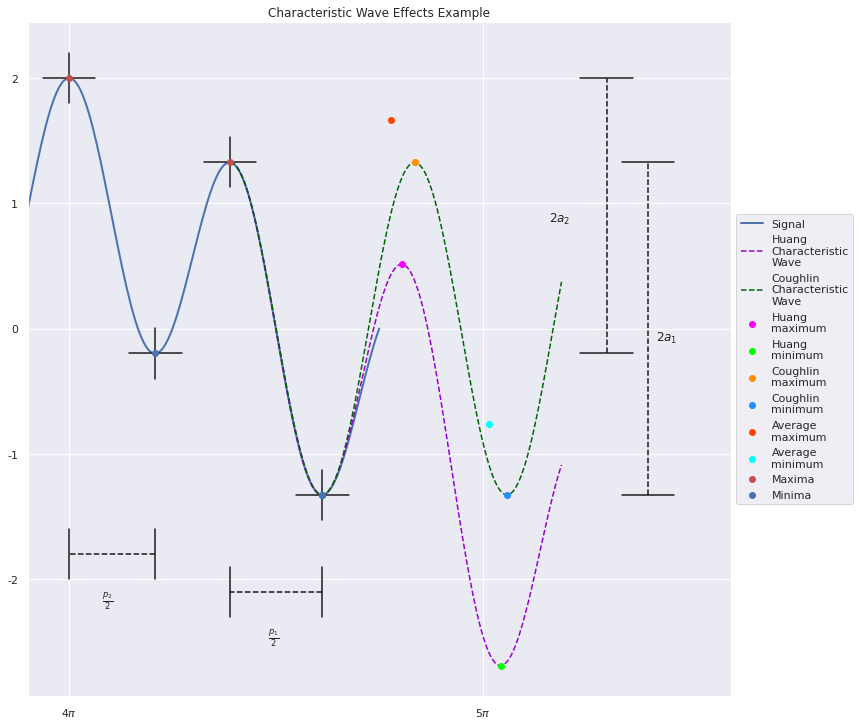

In [21]:
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.title('Characteristic Wave Effects Example')
plt.plot(time, time_series, LineWidth=2, label='Signal')
plt.scatter(Huang_max_time, Huang_max, c='magenta', zorder=4, label=textwrap.fill('Huang maximum', 10))
plt.scatter(Huang_min_time, Huang_min, c='lime', zorder=4, label=textwrap.fill('Huang minimum', 10))
plt.scatter(Coughlin_max_time, Coughlin_max, c='darkorange', zorder=4, label=textwrap.fill('Coughlin maximum', 14))
plt.scatter(Coughlin_min_time, Coughlin_min, c='dodgerblue', zorder=4, label=textwrap.fill('Coughlin minimum', 14))
plt.scatter(Average_max_time, Average_max, c='orangered', zorder=4, label=textwrap.fill('Average maximum', 14))
plt.scatter(Average_min_time, Average_min, c='cyan', zorder=4, label=textwrap.fill('Average minimum', 14))
plt.scatter(maxima_x, maxima_y, c='r', zorder=4, label='Maxima')
plt.scatter(minima_x, minima_y, c='b', zorder=4, label='Minima')
plt.plot(Huang_time, Huang_wave, '--', c='darkviolet', label=textwrap.fill('Huang Characteristic Wave', 14))
plt.plot(Coughlin_time, Coughlin_wave, '--', c='darkgreen', label=textwrap.fill('Coughlin Characteristic Wave', 14))
plt.plot(max_2_x_time, max_2_x, 'k-')
plt.plot(max_2_x_time_side, max_2_x, 'k-')
plt.plot(min_2_x_time, min_2_x, 'k-')
plt.plot(min_2_x_time_side, min_2_x, 'k-')
plt.plot(dash_max_min_2_x_time, dash_max_min_2_x, 'k--')
plt.text(5.16 * np.pi, 0.85, r'$2a_2$')
plt.plot(max_2_y_time, max_2_y, 'k-')
plt.plot(max_2_y_time, max_2_y_side, 'k-')
plt.plot(min_2_y_time, min_2_y, 'k-')
plt.plot(min_2_y_time, min_2_y_side, 'k-')
plt.plot(dash_max_min_2_y_time, dash_max_min_2_y, 'k--')
plt.text(4.08 * np.pi, -2.2, r'$\frac{p_2}{2}$')
plt.plot(max_1_x_time, max_1_x, 'k-')
plt.plot(max_1_x_time_side, max_1_x, 'k-')
plt.plot(min_1_x_time, min_1_x, 'k-')
plt.plot(min_1_x_time_side, min_1_x, 'k-')
plt.plot(dash_max_min_1_x_time, dash_max_min_1_x, 'k--')
plt.text(5.42 * np.pi, -0.1, r'$2a_1$')
plt.plot(max_1_y_time, max_1_y, 'k-')
plt.plot(max_1_y_time, max_1_y_side, 'k-')
plt.plot(min_1_y_time, min_1_y, 'k-')
plt.plot(min_1_y_time, min_1_y_side, 'k-')
plt.plot(dash_max_min_1_y_time, dash_max_min_1_y, 'k--')
plt.text(4.48 * np.pi, -2.5, r'$\frac{p_1}{2}$')
plt.xlim(3.9 * np.pi, 5.6 * np.pi)
plt.xticks((4 * np.pi, 5 * np.pi), (r'4$\pi$', r'5$\pi$'))
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'))
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# FIgure 11

In [22]:
t = np.linspace(5, 95, 100)
signal_orig = np.cos(2 * np.pi * t / 50) + 0.6 * np.cos(2 * np.pi * t / 25) + 0.5 * np.sin(2 * np.pi * t / 200)
util_nn = emd_utils.Utility(time=t, time_series=signal_orig)
maxima = signal_orig[util_nn.max_bool_func_1st_order_fd()]
minima = signal_orig[util_nn.min_bool_func_1st_order_fd()]
cs_max = CubicSpline(t[util_nn.max_bool_func_1st_order_fd()], maxima)
cs_min = CubicSpline(t[util_nn.min_bool_func_1st_order_fd()], minima)
time = np.linspace(0, 5 * np.pi, 1001)
lsq_signal = np.cos(time) + np.cos(5 * time)
knots = np.linspace(0, 5 * np.pi, 101)
time_extended = time_extension(time)
time_series_extended = np.zeros_like(time_extended) / 0
time_series_extended[int(len(lsq_signal) - 1):int(2 * (len(lsq_signal) - 1) + 1)] = lsq_signal
neural_network_m = 200
neural_network_k = 100

# forward ->

P = np.zeros((int(neural_network_k + 1), neural_network_m))
for col in range(neural_network_m):
    P[:-1, col] = lsq_signal[(-(neural_network_m + neural_network_k - col)):(-(neural_network_m - col))]
    P[-1, col] = 1  # for additive constant
t = lsq_signal[-neural_network_m:]
seed_weights = np.ones(neural_network_k) / neural_network_k
weights = 0 * seed_weights.copy()
train_input = P[:-1, :]
lr = 0.01

for iterations in range(1000):

    output = np.matmul(weights, train_input)
    error = (t - output)
    gradients = error * (- train_input)
    # guess average gradients
    average_gradients = np.mean(gradients, axis=1)
    # steepest descent
    max_gradient_vector = average_gradients * (np.abs(average_gradients) == max(np.abs(average_gradients)))
    adjustment = - lr * average_gradients
    # adjustment = - lr * max_gradient_vector
    weights += adjustment

weights_right = np.hstack((weights, 0))
max_count_right = 0
min_count_right = 0
i_right = 0

while ((max_count_right < 1) or (min_count_right < 1)) and (i_right < len(lsq_signal) - 1):

    time_series_extended[int(2 * (len(lsq_signal) - 1) + 1 + i_right)] = \
        sum(weights_right * np.hstack((time_series_extended[int(2 * (len(lsq_signal) - 1) + 1 - neural_network_k + i_right):int(2 * (len(lsq_signal) - 1) + 1 + i_right)], 1)))

    i_right += 1
    if i_right > 1:

        emd_utils_max = \
            emd_utils.Utility(time=time_extended[int(2 * (len(lsq_signal) - 1) + 1):int(2 * (len(lsq_signal) - 1) + 1 + i_right + 1)],
                              time_series=time_series_extended[int(2 * (len(lsq_signal) - 1) + 1):int(2 * (len(lsq_signal) - 1) + 1 + i_right + 1)])

        if sum(emd_utils_max.max_bool_func_1st_order_fd()) > 0:

            max_count_right += 1

        emd_utils_min = \
            emd_utils.Utility(time=time_extended[int(2 * (len(lsq_signal) - 1) + 1):int(2 * (len(lsq_signal) - 1) + 1 + i_right + 1)],
                              time_series=time_series_extended[int(2 * (len(lsq_signal) - 1) + 1):int(2 * (len(lsq_signal) - 1) + 1 + i_right + 1)])

        if sum(emd_utils_min.min_bool_func_1st_order_fd()) > 0:

            min_count_right += 1

# backward <-

P = np.zeros((int(neural_network_k + 1), neural_network_m))
for col in range(neural_network_m):
    P[:-1, col] = lsq_signal[int(col + 1):int(col + neural_network_k + 1)]
    P[-1, col] = 1  # for additive constant
t = lsq_signal[:neural_network_m]
vx = cvx.Variable(int(neural_network_k + 1))
objective = cvx.Minimize(cvx.norm((2 * (vx * P) + 1 - t), 2))  # linear activation function is arbitrary
prob = cvx.Problem(objective)
result = prob.solve(verbose=True, solver=cvx.ECOS)
weights_left = np.array(vx.value)
max_count_left = 0
min_count_left = 0
i_left = 0

while ((max_count_left < 1) or (min_count_left < 1)) and (i_left < len(lsq_signal) - 1):

    time_series_extended[int(len(lsq_signal) - 2 - i_left)] = \
        2 * sum(weights_left * np.hstack((time_series_extended[int(len(lsq_signal) - 1 - i_left):int(len(lsq_signal) - 1 - i_left + neural_network_k)],1))) + 1

    i_left += 1
    if i_left > 1:

        emd_utils_max = \
            emd_utils.Utility(time=time_extended[int(len(lsq_signal) - 1 - i_left):int(len(lsq_signal))],
                              time_series=time_series_extended[int(len(lsq_signal) - 1 - i_left):int(len(lsq_signal))])

        if sum(emd_utils_max.max_bool_func_1st_order_fd()) > 0:

            max_count_left += 1

        emd_utils_min = \
            emd_utils.Utility(time=time_extended[int(len(lsq_signal) - 1 - i_left):int(len(lsq_signal))],
                              time_series=time_series_extended[int(len(lsq_signal) - 1 - i_left):int(len(lsq_signal))])

        if sum(emd_utils_min.min_bool_func_1st_order_fd()) > 0:

            min_count_left += 1


lsq_utils = emd_utils.Utility(time=time, time_series=lsq_signal)
utils_extended = emd_utils.Utility(time=time_extended, time_series=time_series_extended)
maxima = lsq_signal[lsq_utils.max_bool_func_1st_order_fd()]
maxima_time = time[lsq_utils.max_bool_func_1st_order_fd()]
maxima_extrapolate = time_series_extended[utils_extended.max_bool_func_1st_order_fd()][-1]
maxima_extrapolate_time = time_extended[utils_extended.max_bool_func_1st_order_fd()][-1]
minima = lsq_signal[lsq_utils.min_bool_func_1st_order_fd()]
minima_time = time[lsq_utils.min_bool_func_1st_order_fd()]
minima_extrapolate = time_series_extended[utils_extended.min_bool_func_1st_order_fd()][-2:]
minima_extrapolate_time = time_extended[utils_extended.min_bool_func_1st_order_fd()][-2:]

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Sep 28 10:36:11 AM: Your problem has 101 variables, 0 constraints, and 0 parameters.
(CVXPY) Sep 28 10:36:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 28 10:36:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 28 10:36:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 28 10:36:11 AM: Compiling problem (target solver=ECOS).
(CVXPY) Sep 28 10:36:11 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


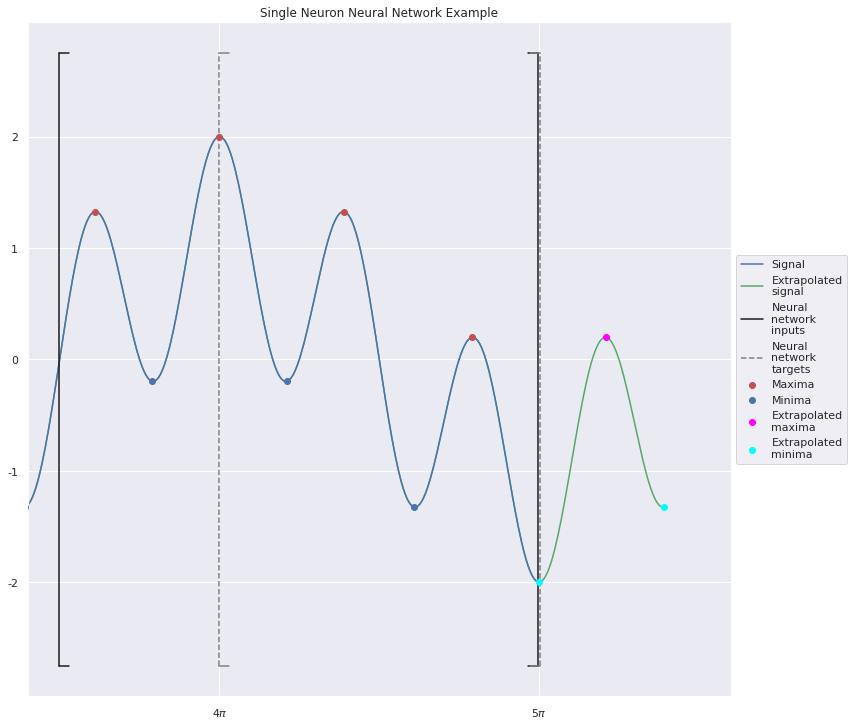

In [23]:
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.title('Single Neuron Neural Network Example')
plt.plot(time, lsq_signal, zorder=2, label='Signal')
plt.plot(time_extended, time_series_extended, c='g', zorder=1, label=textwrap.fill('Extrapolated signal', 12))
plt.scatter(maxima_time, maxima, c='r', zorder=3, label='Maxima')
plt.scatter(minima_time, minima, c='b', zorder=3, label='Minima')
plt.scatter(maxima_extrapolate_time, maxima_extrapolate, c='magenta', zorder=3, label=textwrap.fill('Extrapolated maxima', 12))
plt.scatter(minima_extrapolate_time, minima_extrapolate, c='cyan', zorder=4, label=textwrap.fill('Extrapolated minima', 12))
plt.plot(((time[-302] + time[-301]) / 2) * np.ones(100), np.linspace(-2.75, 2.75, 100), c='k', label=textwrap.fill('Neural network inputs', 13))
plt.plot(np.linspace(((time[-302] + time[-301]) / 2), ((time[-302] + time[-301]) / 2) + 0.1, 100), -2.75 * np.ones(100), c='k')
plt.plot(np.linspace(((time[-302] + time[-301]) / 2), ((time[-302] + time[-301]) / 2) + 0.1, 100), 2.75 * np.ones(100), c='k')
plt.plot(np.linspace(((time_extended[-1001] + time_extended[-1002]) / 2), ((time_extended[-1001] + time_extended[-1002]) / 2) - 0.1, 100), -2.75 * np.ones(100), c='k')
plt.plot(np.linspace(((time_extended[-1001] + time_extended[-1002]) / 2), ((time_extended[-1001] + time_extended[-1002]) / 2) - 0.1, 100), 2.75 * np.ones(100), c='k')
plt.plot(((time_extended[-1001] + time_extended[-1002]) / 2) * np.ones(100), np.linspace(-2.75, 2.75, 100), c='k')
plt.plot(((time[-202] + time[-201]) / 2) * np.ones(100), np.linspace(-2.75, 2.75, 100), c='gray', linestyle='dashed', label=textwrap.fill('Neural network targets', 13))
plt.plot(np.linspace(((time[-202] + time[-201]) / 2), ((time[-202] + time[-201]) / 2) + 0.1, 100), -2.75 * np.ones(100), c='gray')
plt.plot(np.linspace(((time[-202] + time[-201]) / 2), ((time[-202] + time[-201]) / 2) + 0.1, 100), 2.75 * np.ones(100), c='gray')
plt.plot(np.linspace(((time_extended[-1001] + time_extended[-1000]) / 2), ((time_extended[-1001] + time_extended[-1000]) / 2) - 0.1, 100), -2.75 * np.ones(100), c='gray')
plt.plot(np.linspace(((time_extended[-1001] + time_extended[-1000]) / 2), ((time_extended[-1001] + time_extended[-1000]) / 2) - 0.1, 100), 2.75 * np.ones(100), c='gray')
plt.plot(((time_extended[-1001] + time_extended[-1000]) / 2) * np.ones(100), np.linspace(-2.75, 2.75, 100), c='gray',linestyle='dashed')
plt.xlim(3.4 * np.pi, 5.6 * np.pi)
plt.xticks((4 * np.pi, 5 * np.pi), (r'4$\pi$', r'5$\pi$'))
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'))
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 12

In [24]:
np.random.seed(0)
time = np.linspace(0, 5 * np.pi, 1001)
knots_51 = np.linspace(0, 5 * np.pi, 51)
time_series = np.cos(2 * time) + np.cos(4 * time) + np.cos(8 * time)
noise = np.random.normal(0, 1, len(time_series))
time_series += noise
advemdpy = EMD(time=time, time_series=time_series)
imfs_51, hts_51, ifs_51 = advemdpy.empirical_mode_decomposition(knots=knots_51, max_imfs=3, edge_effect='symmetric_anchor', verbose=False)[:3]
knots_31 = np.linspace(0, 5 * np.pi, 31)
imfs_31, hts_31, ifs_31 = advemdpy.empirical_mode_decomposition(knots=knots_31, max_imfs=2, edge_effect='symmetric_anchor', verbose=False)[:3]
knots_11 = np.linspace(0, 5 * np.pi, 11)
imfs_11, hts_11, ifs_11 = advemdpy.empirical_mode_decomposition(knots=knots_11, max_imfs=1, edge_effect='symmetric_anchor', verbose=False)[:3]

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/AdvEMDpy/AdvEMDpy.py:1191: UserWarning: Recommended knots are subset of knot time points for discontinuity issues.
  warnings.warn('Recommended knots are subset of knot time points for discontinuity issues.')


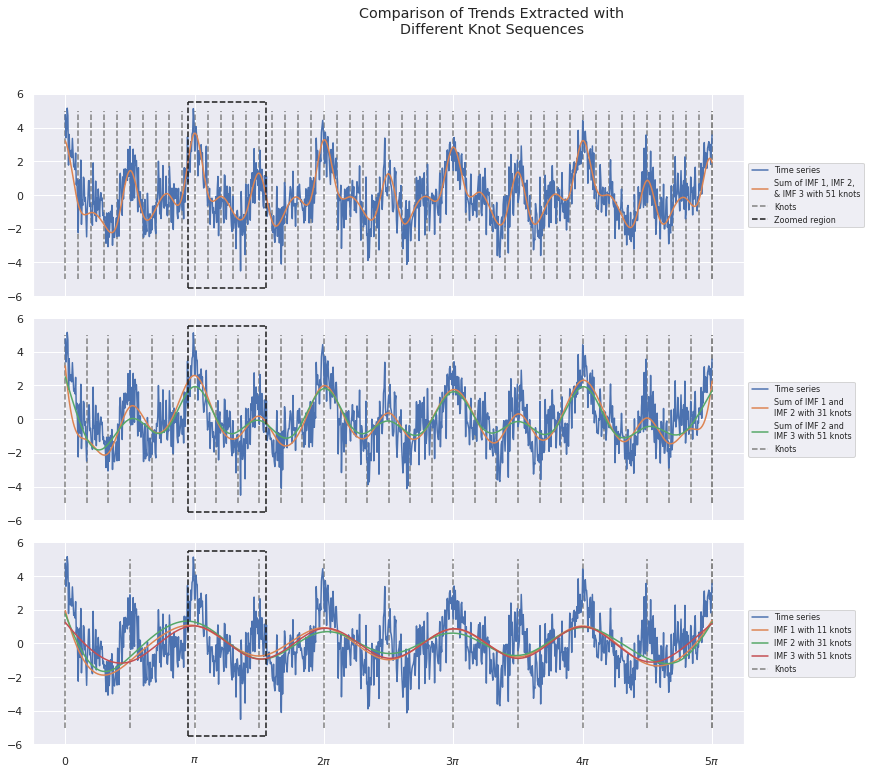

In [25]:
fig, axs = plt.subplots(3, 1)
plt.suptitle(textwrap.fill('Comparison of Trends Extracted with Different Knot Sequences', 40))
plt.subplots_adjust(hspace=0.1)
axs[0].plot(time, time_series, label='Time series')
axs[0].plot(time, imfs_51[1, :] + imfs_51[2, :] + imfs_51[3, :], label=textwrap.fill('Sum of IMF 1, IMF 2, & IMF 3 with 51 knots', 21))
for knot in knots_51:
    axs[0].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[0].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[0].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[0].set_xticklabels(['', '', '', '', '', ''])
axs[0].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), 5.5 * np.ones(101), 'k--')
axs[0].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), -5.5 * np.ones(101), 'k--')
axs[0].plot(0.95 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--')
axs[0].plot(1.55 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--', label='Zoomed region')
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

axs[1].plot(time, time_series, label='Time series')
axs[1].plot(time, imfs_31[1, :] + imfs_31[2, :], label=textwrap.fill('Sum of IMF 1 and IMF 2 with 31 knots', 19))
axs[1].plot(time, imfs_51[2, :] + imfs_51[3, :], label=textwrap.fill('Sum of IMF 2 and IMF 3 with 51 knots', 19))
for knot in knots_31:
    axs[1].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[1].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[1].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[1].set_xticklabels(['', '', '', '', '', ''])
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.85, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[1].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), 5.5 * np.ones(101), 'k--')
axs[1].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), -5.5 * np.ones(101), 'k--')
axs[1].plot(0.95 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--')
axs[1].plot(1.55 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--', label='Zoomed region')

axs[2].plot(time, time_series, label='Time series')
axs[2].plot(time, imfs_11[1, :], label='IMF 1 with 11 knots')
axs[2].plot(time, imfs_31[2, :], label='IMF 2 with 31 knots')
axs[2].plot(time, imfs_51[3, :], label='IMF 3 with 51 knots')
for knot in knots_11:
    axs[2].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[2].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[2].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[2].set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.05, box_2.y0, box_2.width * 0.85, box_2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[2].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), 5.5 * np.ones(101), 'k--')
axs[2].plot(np.linspace(0.95 * np.pi, 1.55 * np.pi, 101), -5.5 * np.ones(101), 'k--')
axs[2].plot(0.95 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--')
axs[2].plot(1.55 * np.pi * np.ones(101), np.linspace(-5.5, 5.5, 101), 'k--', label='Zoomed region')
plt.show()

# Figure 13

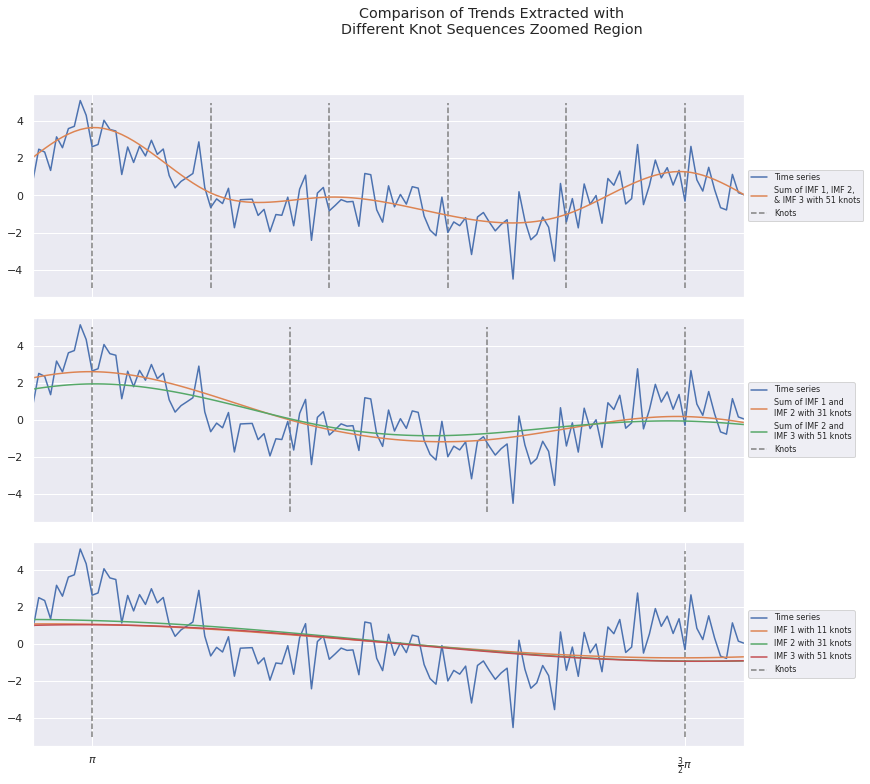

In [26]:
fig, axs = plt.subplots(3, 1)
plt.suptitle(textwrap.fill('Comparison of Trends Extracted with Different Knot Sequences Zoomed Region', 40))
plt.subplots_adjust(hspace=0.1)
axs[0].plot(time, time_series, label='Time series')
axs[0].plot(time, imfs_51[1, :] + imfs_51[2, :] + imfs_51[3, :], label=textwrap.fill('Sum of IMF 1, IMF 2, & IMF 3 with 51 knots', 21))
for knot in knots_51:
    axs[0].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[0].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[0].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[0].set_xticklabels(['', '', '', '', '', ''])
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[0].set_ylim(-5.5, 5.5)
axs[0].set_xlim(0.95 * np.pi, 1.55 * np.pi)

axs[1].plot(time, time_series, label='Time series')
axs[1].plot(time, imfs_31[1, :] + imfs_31[2, :], label=textwrap.fill('Sum of IMF 1 and IMF 2 with 31 knots', 19))
axs[1].plot(time, imfs_51[2, :] + imfs_51[3, :], label=textwrap.fill('Sum of IMF 2 and IMF 3 with 51 knots', 19))
for knot in knots_31:
    axs[1].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[1].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[1].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[1].set_xticklabels(['', '', '', '', '', ''])
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.85, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[1].set_ylim(-5.5, 5.5)
axs[1].set_xlim(0.95 * np.pi, 1.55 * np.pi)

axs[2].plot(time, time_series, label='Time series')
axs[2].plot(time, imfs_11[1, :], label='IMF 1 with 11 knots')
axs[2].plot(time, imfs_31[2, :], label='IMF 2 with 31 knots')
axs[2].plot(time, imfs_51[3, :], label='IMF 3 with 51 knots')
for knot in knots_11:
    axs[2].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1)
axs[2].plot(knot * np.ones(101), np.linspace(-5, 5, 101), '--', c='grey', zorder=1, label='Knots')
axs[2].set_xticks([np.pi, (3 / 2) * np.pi])
axs[2].set_xticklabels([r'$\pi$', r'$\frac{3}{2}\pi$'])
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.05, box_2.y0, box_2.width * 0.85, box_2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[2].set_ylim(-5.5, 5.5)
axs[2].set_xlim(0.95 * np.pi, 1.55 * np.pi)
plt.show()

# Detrended Fluctuation Analysis Errors

\begin{equation}
\begin{split}
    SD\bigg(f(t) - \sum_{i=1}^3{IMF^{51}_i(t)}\bigg) &= 1.005 \approx 1\\
    SD\bigg(f(t) - \sum_{i=1}^2{IMF^{31}_i(t)}\bigg) &= 1.558\\
    SD\bigg(f(t) - IMF^{11}_1(t)\bigg) &= 2.072,
\end{split}
\end{equation}

In [27]:
print(np.round(np.var(time_series - (imfs_51[1, :] + imfs_51[2, :] + imfs_51[3, :])), 3))
print(np.round(np.var(time_series - (imfs_31[1, :] + imfs_31[2, :])), 3))
print(np.round(np.var(time_series - imfs_51[3, :]), 3))

1.005
1.558
2.072


# Figure 14

In [28]:
hs_ouputs = hilbert_spectrum(time, imfs_51, hts_51, ifs_51, max_frequency=12, plot=False)

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


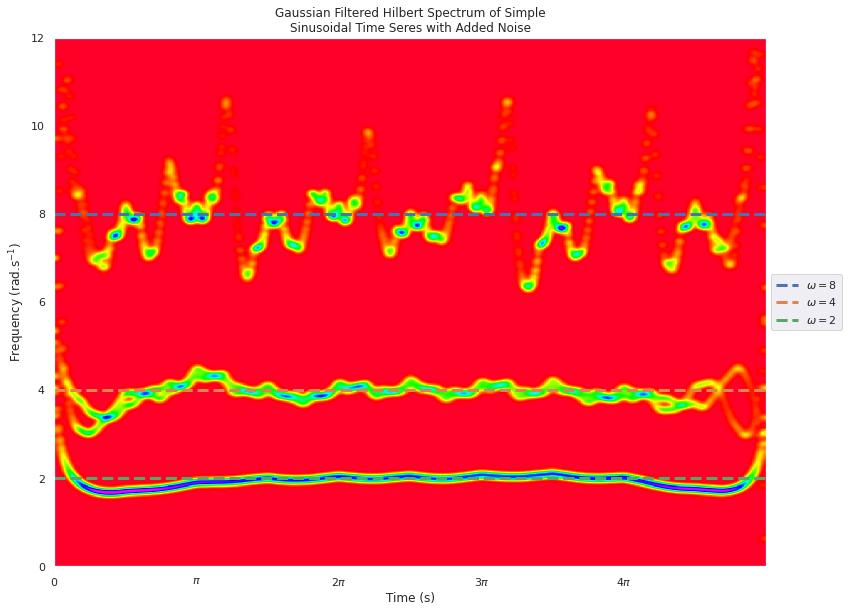

In [29]:
ax = plt.subplot(111)
figure_size = plt.gcf().get_size_inches()
factor = 0.9
plt.gcf().set_size_inches((figure_size[0], factor * figure_size[1]))
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Simple Sinusoidal Time Seres with Added Noise', 50))
x_hs, y, z = hs_ouputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 8 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 8$', Linewidth=3)
ax.plot(x_hs[0, :], 4 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 4$', Linewidth=3)
ax.plot(x_hs[0, :], 2 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 2$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 15

In [30]:
time = np.linspace(0, 5 * np.pi, 1001)
time_series = np.cos(time) + np.cos(5 * time)
knots = np.linspace(0, 5 * np.pi, 51)
fluc = Fluctuation(time=time, time_series=time_series)
max_unsmoothed = fluc.envelope_basis_function_approximation(knots_for_envelope=knots, extrema_type='maxima', smooth=False)
max_smoothed = fluc.envelope_basis_function_approximation(knots_for_envelope=knots, extrema_type='maxima', smooth=True)
min_unsmoothed = fluc.envelope_basis_function_approximation(knots_for_envelope=knots, extrema_type='minima', smooth=False)
min_smoothed = fluc.envelope_basis_function_approximation(knots_for_envelope=knots, extrema_type='minima', smooth=True)
util = Utility(time=time, time_series=time_series)
maxima = util.max_bool_func_1st_order_fd()
minima = util.min_bool_func_1st_order_fd()

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


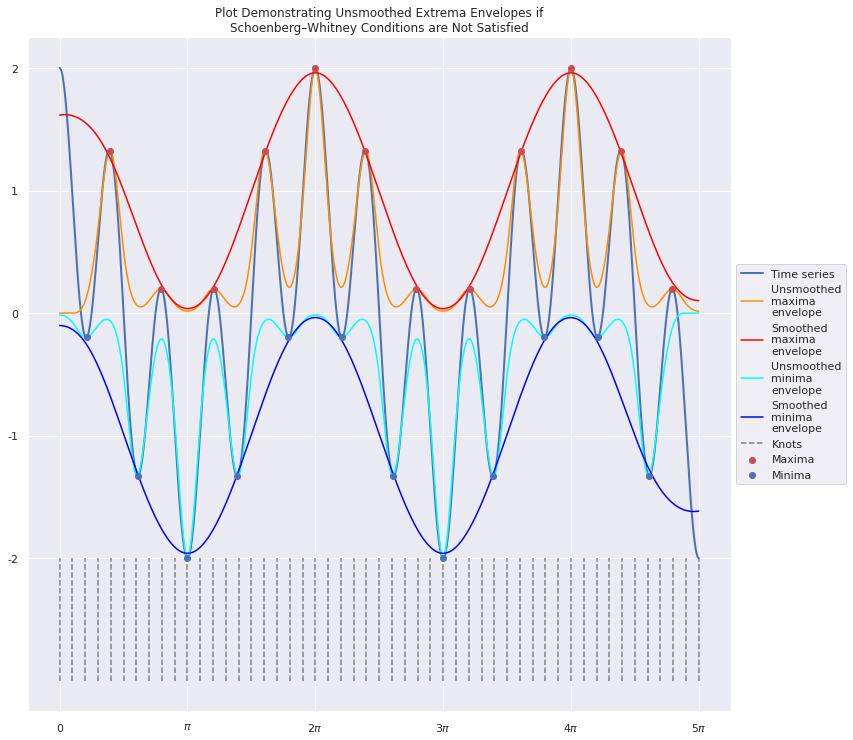

In [31]:
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.title(textwrap.fill('Plot Demonstrating Unsmoothed Extrema Envelopes if Schoenberg–Whitney Conditions are Not Satisfied', 50))
plt.plot(time, time_series, label='Time series', zorder=2, LineWidth=2)
plt.scatter(time[maxima], time_series[maxima], c='r', label='Maxima', zorder=10)
plt.scatter(time[minima], time_series[minima], c='b', label='Minima', zorder=10)
plt.plot(time, max_unsmoothed[0], label=textwrap.fill('Unsmoothed maxima envelope', 10), c='darkorange')
plt.plot(time, max_smoothed[0], label=textwrap.fill('Smoothed maxima envelope', 10), c='red')
plt.plot(time, min_unsmoothed[0], label=textwrap.fill('Unsmoothed minima envelope', 10), c='cyan')
plt.plot(time, min_smoothed[0], label=textwrap.fill('Smoothed minima envelope', 10), c='blue')
for knot in knots[:-1]:
    plt.plot(knot * np.ones(101), np.linspace(-3.0, -2.0, 101), '--', c='grey', zorder=1)
plt.plot(knots[-1] * np.ones(101), np.linspace(-3.0, -2.0, 101), '--', c='grey', label='Knots', zorder=1)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'))
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'))
plt.xlim(-0.25 * np.pi, 5.25 * np.pi)
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 16

In [32]:
a = 0.25
width = 0.2
time = np.linspace((0 + a) * np.pi, (5 - a) * np.pi, 1001)
knots = np.linspace((0 + a) * np.pi, (5 - a) * np.pi, 11)
time_series = np.cos(time) + np.cos(5 * time)
utils = emd_utils.Utility(time=time, time_series=time_series)
max_bool = utils.max_bool_func_1st_order_fd()
maxima_x = time[max_bool]
maxima_y = time_series[max_bool]
min_bool = utils.min_bool_func_1st_order_fd()
minima_x = time[min_bool]
minima_y = time_series[min_bool]
inflection_bool = utils.inflection_point()
inflection_x = time[inflection_bool]
inflection_y = time_series[inflection_bool]

fluctuation = emd_mean.Fluctuation(time=time, time_series=time_series)
maxima_envelope = fluctuation.envelope_basis_function_approximation(knots, 'maxima', smooth=False, smoothing_penalty=0.2, edge_effect='none', spline_method='b_spline')[0]
maxima_envelope_smooth = fluctuation.envelope_basis_function_approximation(knots, 'maxima', smooth=True, smoothing_penalty=0.2, edge_effect='none', spline_method='b_spline')[0]
minima_envelope = fluctuation.envelope_basis_function_approximation(knots, 'minima', smooth=False, smoothing_penalty=0.2, edge_effect='none', spline_method='b_spline')[0]
minima_envelope_smooth = fluctuation.envelope_basis_function_approximation(knots, 'minima', smooth=True, smoothing_penalty=0.2, edge_effect='none', spline_method='b_spline')[0]
inflection_points_envelope = fluctuation.direct_detrended_fluctuation_estimation(knots, smooth=True, smoothing_penalty=0.2, technique='inflection_points')[0]
binomial_points_envelope = fluctuation.direct_detrended_fluctuation_estimation(knots, smooth=True, smoothing_penalty=0.2, technique='binomial_average', order=21, increment=20)[0]
derivative_of_lsq = utils.derivative_forward_diff()
derivative_time = time[:-1]
derivative_knots = np.linspace(knots[0], knots[-1], 31)

# change (1) detrended_fluctuation_technique and (2) max_internal_iter and (3) debug (confusing with external debugging)
emd = AdvEMDpy.EMD(time=derivative_time, time_series=derivative_of_lsq)
imf_1_of_derivative = emd.empirical_mode_decomposition(knots=derivative_knots, knot_time=derivative_time, text=False)[0][1, :]
utils = emd_utils.Utility(time=time[:-1], time_series=imf_1_of_derivative)
optimal_maxima = np.r_[False, utils.derivative_forward_diff() < 0, False] & np.r_[utils.zero_crossing() == 1, False]
optimal_minima = np.r_[False, utils.derivative_forward_diff() > 0, False] & np.r_[utils.zero_crossing() == 1, False]

EEMD_maxima_envelope = fluctuation.envelope_basis_function_approximation_fixed_points(knots, 'maxima', optimal_maxima, optimal_minima, smooth=False, smoothing_penalty=0.2, edge_effect='none')[0]
EEMD_minima_envelope = fluctuation.envelope_basis_function_approximation_fixed_points(knots, 'minima', optimal_maxima, optimal_minima, smooth=False, smoothing_penalty=0.2, edge_effect='none')[0]

/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/AdvEMDpy/AdvEMDpy.py:1191: UserWarning: Recommended knots are subset of knot time points for discontinuity issues.
  warnings.warn('Recommended knots are subset of knot time points for discontinuity issues.')


IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 103.2
IMF_12 Standard deviation STOPPING CRITERION NOT MET with sd = 57.58
IMF_13 Standard deviation STOPPING CRITERION MET with sd = 6.12 < sd threshold = 10
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 152126.49
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 565066.16
IMF_23 ALL IMF CONDITIONS MET
IMF_31 TREND CONDITION MET with fewer than 3 extrema and global mean removed
IMF_32 ALL IMF CONDITIONS MET


/home/cole/miniconda3/envs/advemdpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


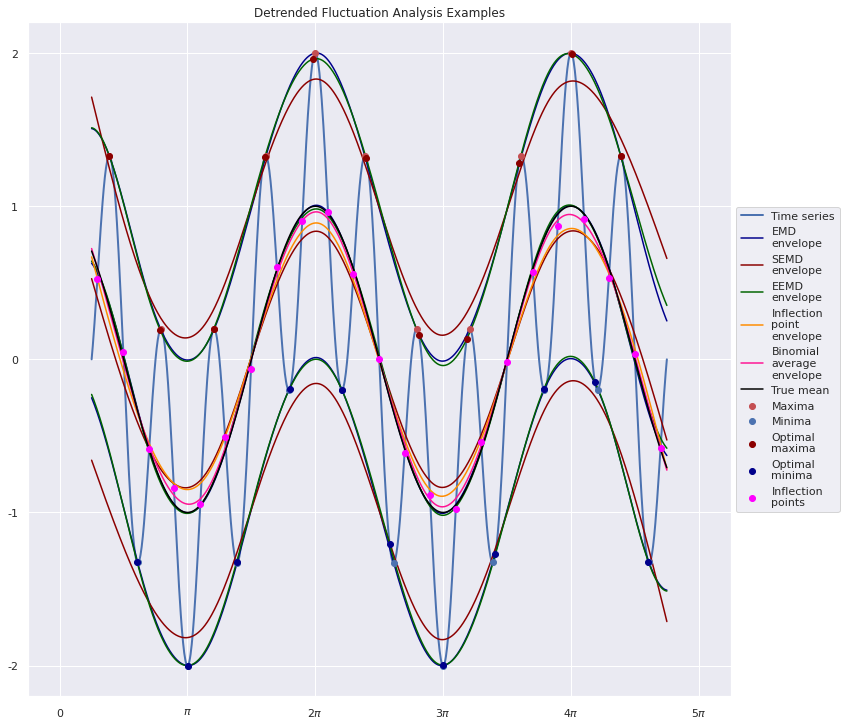

In [33]:
ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.title('Detrended Fluctuation Analysis Examples')
plt.plot(time, time_series, LineWidth=2, label='Time series')
plt.scatter(maxima_x, maxima_y, c='r', zorder=4, label='Maxima')
plt.scatter(minima_x, minima_y, c='b', zorder=4, label='Minima')
plt.scatter(time[optimal_maxima], time_series[optimal_maxima], c='darkred', zorder=4, label=textwrap.fill('Optimal maxima', 10))
plt.scatter(time[optimal_minima], time_series[optimal_minima], c='darkblue', zorder=4, label=textwrap.fill('Optimal minima', 10))
plt.scatter(inflection_x, inflection_y, c='magenta', zorder=4, label=textwrap.fill('Inflection points', 10))
plt.plot(time, maxima_envelope, c='darkblue', label=textwrap.fill('EMD envelope', 10))
plt.plot(time, minima_envelope, c='darkblue')
plt.plot(time, (maxima_envelope + minima_envelope) / 2, c='darkblue')
plt.plot(time, maxima_envelope_smooth, c='darkred', label=textwrap.fill('SEMD envelope', 10))
plt.plot(time, minima_envelope_smooth, c='darkred')
plt.plot(time, (maxima_envelope_smooth + minima_envelope_smooth) / 2, c='darkred')
plt.plot(time, EEMD_maxima_envelope, c='darkgreen', label=textwrap.fill('EEMD envelope', 10))
plt.plot(time, EEMD_minima_envelope, c='darkgreen')
plt.plot(time, (EEMD_maxima_envelope + EEMD_minima_envelope) / 2, c='darkgreen')
plt.plot(time, inflection_points_envelope, c='darkorange', label=textwrap.fill('Inflection point envelope', 10))
plt.plot(time, binomial_points_envelope, c='deeppink', label=textwrap.fill('Binomial average envelope', 10))
plt.plot(time, np.cos(time), c='black', label='True mean')
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'))
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'))
plt.xlim(-0.25 * np.pi, 5.25 * np.pi)
box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Figure 17

In [34]:
knots = np.arange(12)
time = np.linspace(0, 11, 1101)
basis = emd_basis.Basis(time=time, time_series=time)
b_spline_basis = basis.cubic_b_spline(knots)
chsi_basis = basis.chsi_basis(knots)

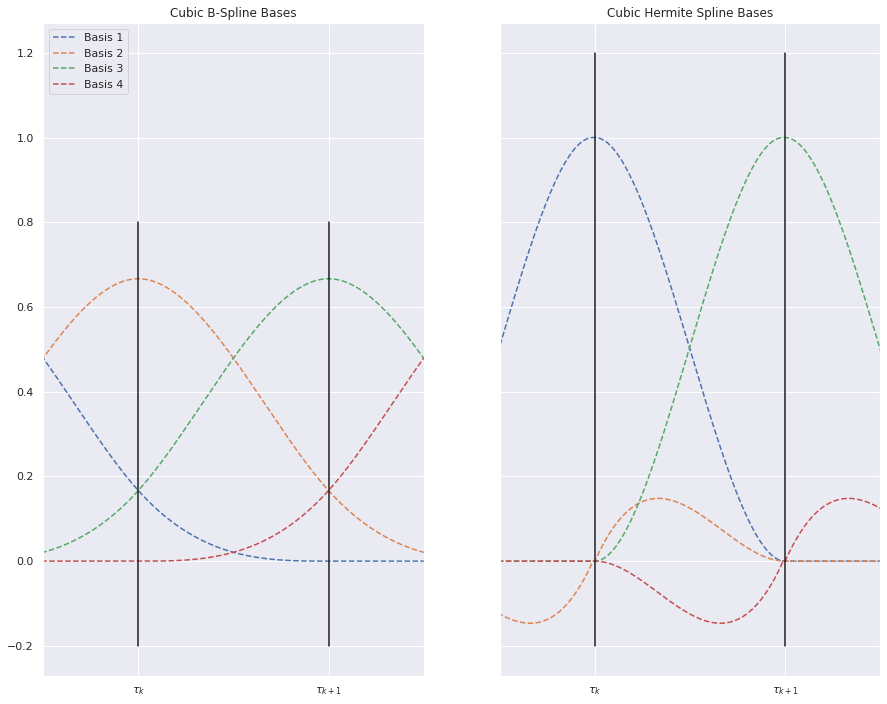

In [35]:
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].set_title('Cubic B-Spline Bases')
axs[0].plot(time, b_spline_basis[2, :].T, '--', label='Basis 1')
axs[0].plot(time, b_spline_basis[3, :].T, '--', label='Basis 2')
axs[0].plot(time, b_spline_basis[4, :].T, '--', label='Basis 3')
axs[0].plot(time, b_spline_basis[5, :].T, '--', label='Basis 4')
axs[0].legend(loc='upper left')
axs[0].plot(5 * np.ones(100), np.linspace(-0.2, 0.8, 100), 'k-')
axs[0].plot(6 * np.ones(100), np.linspace(-0.2, 0.8, 100), 'k-')
axs[0].set_xticks([5, 6])
axs[0].set_xticklabels([r'$ \tau_k $', r'$ \tau_{k+1} $'])
axs[0].set_xlim(4.5, 6.5)
axs[1].set_title('Cubic Hermite Spline Bases')
axs[1].plot(time, chsi_basis[10, :].T, '--')
axs[1].plot(time, chsi_basis[11, :].T, '--')
axs[1].plot(time, chsi_basis[12, :].T, '--')
axs[1].plot(time, chsi_basis[13, :].T, '--')
axs[1].plot(5 * np.ones(100), np.linspace(-0.2, 1.2, 100), 'k-')
axs[1].plot(6 * np.ones(100), np.linspace(-0.2, 1.2, 100), 'k-')
axs[1].set_xticks([5, 6])
axs[1].set_xticklabels([r'$ \tau_k $', r'$ \tau_{k+1} $'])
axs[1].set_xlim(4.5, 6.5)
plt.show()